In [75]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [76]:
miRNA = pd.read_csv('miRNA.csv')
signal = pd.read_csv('signal.csv')
signal["crhomesome"] = signal["crhomesome"].astype(str)
display(miRNA.head())
display(signal.head())

,ID,chromosome,start,end,strand,gene,seq
0,ENSMUST00020182969.1,Y,20134948,20135057,1,ENSMUSG00002074919.1,GGGCATCTGCTGACATGGGGGCCGAAGTCAGTCGCCAGGCAGCGGG...
1,ENSMUST00020183589.1,Y,991657,991716,-1,ENSMUSG00002076920.1,TCTCATCTGATCTCGGAAGCTAAGCAGGGTCGGGCCTGGTTAGTAC...
2,ENSMUST00020183415.1,Y,2446010,2446108,-1,ENSMUSG00002075837.1,TTAACTTTTACTTTAATAACATATATATGTATGTGTGTGTGTGTGT...
3,ENSMUST00020183034.1,Y,5542752,5542861,1,ENSMUSG00002075850.1,GGGCATCTGCTGACATGGGGGCCGAAGTCAGGCGCCAGGCAGTGGG...
4,ENSMUST00020181908.1,Y,40639526,40639635,1,ENSMUSG00002075449.1,GGGCATCTGCTGACATGGGGGCCGAAGTCAGGCGCCAGGCAGCGGG...


,name,crhomesome,start,end,seq,seq_3utr
0,rankl,14,78514285,78546083,TTTTGTACCCTCTACCCATCCCTTTGTCTAGTTCTTCCTGGCTCAC...,GACTCATTTCGTGGAACATTAGCATGGATGTCCTAGATGTTTGGAA...
1,sost,11,101853284,101857841,ACTGGAGCCTGTGCTACCGAGTGCCCTCCTCCACCTGGCAGCATGC...,AGCGAGCCCGCGCCTATGCAGCCCCCGCGCGATCCGATTCGTTTTC...


**RANKL**

In [58]:
x = miRNA[miRNA["chromosome"]== signal["crhomesome"][0]]#[miRNA["start"] > mRNA["end"][1]]#[miRNA["end"] < mRNA["end"][1]]
x

,ID,chromosome,start,end,strand,gene,seq
54,ENSMUST00000239597.2,14,97286917,97287021,-1,ENSMUSG00000119804.2,GTGTTTCTGTTAATCCACTGGGTTTTCTTTCTGGATATAAGAGGTG...
96,ENSMUST00000175340.3,14,25534863,25534947,1,ENSMUSG00000093081.3,TGTGGTTTGTACTGTCTGGGAGCAGCCAAGGACAAGTTACCTCTTG...
100,ENSMUST00020183769.1,14,100938057,100938173,1,ENSMUSG00002075538.1,ATGTGGTGTGTGTGTGTGTGTGTACATGTACATGTATATATATATG...
108,ENSMUST00000175043.3,14,58035881,58035944,1,ENSMUSG00000092784.3,CTGCGGACGGGTGGGCGGGCAGGCCAAATGGCGCGCCCGAGGCTGA...
132,ENSMUST00000175160.3,14,103219985,103220068,-1,ENSMUSG00000092901.3,CCTGGAGCGCGCGGGCGAGGCAGGCGCAGCGCACCGGGGCTCTCGT...
...,...,...,...,...,...,...,...
1666,ENSMUST00020183021.1,14,42436183,42436303,-1,ENSMUSG00002074887.1,ACACCTTCTGCTGGAGACAATATAAGGACATTGGAAGAAGGGAGTC...
1667,ENSMUST00020183543.1,14,42446874,42446994,-1,ENSMUSG00002075543.1,ACACCTTCTGCTGGAGACAATATAAGGACATTGGAAGAAGGGAGTC...
1675,ENSMUST00020181811.1,14,42096376,42096496,-1,ENSMUSG00002075759.1,ACACCTTCTGCTGGAGACAATATAAGGACATTGGAAGAAGGGAGTC...
1676,ENSMUST00020182707.1,14,42102299,42102419,-1,ENSMUSG00002076305.1,ACACCTTCTGCTGGAGACAATATAAGGACATTGGAAGAAGGGAGTC...


In [59]:
import gget
y =  x["ID"].values
for i in range(len(y)):
    z = gget.info(y[i])
    if i == 0:
        df = z
    else:
        df = pd.concat([df,z],axis=0)

Tue Oct  3 11:43:35 2023 INFO We noticed that you passed a version number with your Ensembl ID.
Please note that gget info will always return information linked to the latest Ensembl ID version (see 'ensembl_id').
Tue Oct  3 11:43:37 2023 WARNING No UniProt entry was found for ID ENSMUST00000239597.
Tue Oct  3 11:43:39 2023 INFO We noticed that you passed a version number with your Ensembl ID.
Please note that gget info will always return information linked to the latest Ensembl ID version (see 'ensembl_id').
Tue Oct  3 11:43:41 2023 WARNING No UniProt entry was found for ID ENSMUST00000175340.
Tue Oct  3 11:43:44 2023 INFO We noticed that you passed a version number with your Ensembl ID.
Please note that gget info will always return information linked to the latest Ensembl ID version (see 'ensembl_id').
Tue Oct  3 11:43:47 2023 WARNING No UniProt entry was found for ID ENSMUST00020183769.
Tue Oct  3 11:43:48 2023 INFO We noticed that you passed a version number with your Ensembl ID.
P

In [60]:
df_merge = pd.DataFrame({"ID":df["ensembl_id"].values,"ensembl_gene_name":df["ensembl_gene_name"].values})
miRNA_rankl = pd.merge(x,df_merge,on="ID",how="left")
miRNA_rankl["signal_name"] = signal["name"][0]
display(miRNA_rankl.head())

,ID,chromosome,start,end,strand,gene,seq,ensembl_gene_name,signal_name
0,ENSMUST00000239597.2,14,97286917,97287021,-1,ENSMUSG00000119804.2,GTGTTTCTGTTAATCCACTGGGTTTTCTTTCTGGATATAAGAGGTG...,Gm54390-201,rankl
1,ENSMUST00000175340.3,14,25534863,25534947,1,ENSMUSG00000093081.3,TGTGGTTTGTACTGTCTGGGAGCAGCCAAGGACAAGTTACCTCTTG...,Mir3075-201,rankl
2,ENSMUST00020183769.1,14,100938057,100938173,1,ENSMUSG00002075538.1,ATGTGGTGTGTGTGTGTGTGTGTACATGTACATGTATATATATATG...,Gm54404-201,rankl
3,ENSMUST00000175043.3,14,58035881,58035944,1,ENSMUSG00000092784.3,CTGCGGACGGGTGGGCGGGCAGGCCAAATGGCGCGCCCGAGGCTGA...,Mir3077-201,rankl
4,ENSMUST00000175160.3,14,103219985,103220068,-1,ENSMUSG00000092901.3,CCTGGAGCGCGCGGGCGAGGCAGGCGCAGCGCACCGGGGCTCTCGT...,Mir5130-201,rankl


In [61]:
miRNA_rankl["in_signal"] = 0
miRNA_rankl["in_signal"][miRNA_rankl["start"] > signal["start"][0]][miRNA_rankl["end"]<signal["end"][0] ] = 1
miRNA_rankl["after_signal"] = 0
miRNA_rankl["after_signal"][miRNA_rankl["start"] > signal["end"][0]] = 1/(miRNA_rankl["start"] - signal["end"][0])
miRNA_rankl["before_signal"] = 0
miRNA_rankl["before_signal"][miRNA_rankl["end"] < signal["start"][0]] = 1/(signal["start"][0] - miRNA_rankl["end"])
miRNA_rankl.describe()

,start,end,strand,in_signal,after_signal,before_signal
count,7.100000e+01,7.100000e+01,71.000000,71.0,7.100000e+01,7.100000e+01
mean,6.581343e+07,6.581353e+07,-0.126761,0.0,3.095545e-08,6.626828e-07
std,3.179458e+07,3.179459e+07,0.998993,0.0,1.248470e-07,4.103849e-06
min,4.268943e+06,4.269021e+06,-1.000000,0.0,0.000000e+00,0.000000e+00
25%,4.244153e+07,4.244165e+07,-1.000000,0.0,0.000000e+00,0.000000e+00
50%,6.307517e+07,6.307531e+07,-1.000000,0.0,0.000000e+00,2.592212e-08
75%,9.222249e+07,9.222258e+07,1.000000,0.0,2.622262e-08,5.212006e-08
max,1.188298e+08,1.188299e+08,1.000000,0.0,7.977510e-07,3.275038e-05


**SOST**

In [46]:
x = miRNA[miRNA["chromosome"]== signal["crhomesome"][1]]#[miRNA["start"] > mRNA["end"][1]]#[miRNA["end"] < mRNA["end"][1]]
x

,ID,chromosome,start,end,strand,gene,seq
214,ENSMUST00020182057.1,11,75209314,75209434,-1,ENSMUSG00002076300.1,TTTTCCTAAGGTATTTACTGCTGGTGTTGAAATCTCTTGACTGGGT...
222,ENSMUST00000184148.3,11,97635723,97635861,1,ENSMUSG00000098919.3,GGTACCGCCCGTCCCCGGGCGCTTGCAGCTGCCCCGCCCACTCCTC...
240,ENSMUST00000083595.3,11,75354542,75354636,1,ENSMUSG00000065529.3,ACCTGGCTGAGCCGCAGTAGTTCTTCAGTGGCAAGCTTTATGTCCT...
253,ENSMUST00020182836.1,11,97832497,97832566,-1,ENSMUSG00002076152.1,TGGGGGACTCCTAACAGTGGGAGCAGGGGCTGTCTCTGACTCTGCT...
259,ENSMUST00000197943.4,11,23447749,23447839,-1,ENSMUSG00000106362.4,CAGGGGGACCCGCGCTGGATCGTGGAGGAGCGGGAGGACGGGACCA...
...,...,...,...,...,...,...,...
2128,ENSMUST00000175537.3,11,85651442,85651528,-1,ENSMUSG00000093278.3,AGCGGAGGAGGTAGAGGGTGGTGGAATTTGATGTCATCTCTGCCAC...
2134,ENSMUST00000184154.3,11,6351630,6351693,1,ENSMUSG00000098516.3,AAGTGGAAAGCCAGCCTGAGATGCATTGTGATAATCTGTCTCAGTT...
2135,ENSMUST00000175144.4,11,6422225,6422277,-1,ENSMUSG00000092885.4,AATGTGGAAGTGGTCTGAGGCATATAGAGTATATGCCAAGAACACT...
2144,ENSMUST00000174986.3,11,68881400,68881504,-1,ENSMUSG00000092727.3,GCCATGGTGAGGAAGCCAGGGAGAATGTAGTGTTACCGTGAGCCTG...


In [38]:
import gget
y =  x["ID"].values
for i in range(len(y)):
    z = gget.info(y[i])
    if i == 0:
        df = z
    else:
        df = pd.concat([df,z],axis=0)

Tue Oct  3 11:09:41 2023 INFO We noticed that you passed a version number with your Ensembl ID.
Please note that gget info will always return information linked to the latest Ensembl ID version (see 'ensembl_id').
Tue Oct  3 11:09:45 2023 WARNING No UniProt entry was found for ID ENSMUST00020182057.
Tue Oct  3 11:09:46 2023 WARNING The NCBI server request for Ensembl ID 'ENSMUST00020182057' returned the following error:
HTTPSConnectionPool(host='www.ncbi.nlm.nih.gov', port=443): Max retries exceeded with url: /gene/?term=ENSMUST00020182057 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fba739ddee0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
Tue Oct  3 11:09:46 2023 INFO We noticed that you passed a version number with your Ensembl ID.
Please note that gget info will always return information linked to the latest Ensembl ID version (see 'ensembl_id').
Tue Oct  3 11:09:48 2023 WARNING No UniProt entry 

In [48]:
df_merge = pd.DataFrame({"ID":df["ensembl_id"].values,"ensembl_gene_name":df["ensembl_gene_name"].values})
miRNA_sost = pd.merge(x,df_merge,on="ID",how="left")
miRNA_sost["signal_name"] = signal["name"][1]
display(miRNA_sost.head())

,ID,chromosome,start,end,strand,gene,seq,ensembl_gene_name,signal_name
0,ENSMUST00020182057.1,11,75209314,75209434,-1,ENSMUSG00002076300.1,TTTTCCTAAGGTATTTACTGCTGGTGTTGAAATCTCTTGACTGGGT...,Gm54808-201,sost
1,ENSMUST00000184148.3,11,97635723,97635861,1,ENSMUSG00000098919.3,GGTACCGCCCGTCCCCGGGCGCTTGCAGCTGCCCCGCCCACTCCTC...,Mir8102-201,sost
2,ENSMUST00000083595.3,11,75354542,75354636,1,ENSMUSG00000065529.3,ACCTGGCTGAGCCGCAGTAGTTCTTCAGTGGCAAGCTTTATGTCCT...,Mir22-201,sost
3,ENSMUST00020182836.1,11,97832497,97832566,-1,ENSMUSG00002076152.1,TGGGGGACTCCTAACAGTGGGAGCAGGGGCTGTCTCTGACTCTGCT...,Gm54848-201,sost
4,ENSMUST00000197943.4,11,23447749,23447839,-1,ENSMUSG00000106362.4,CAGGGGGACCCGCGCTGGATCGTGGAGGAGCGGGAGGACGGGACCA...,Gm47279-201,sost
...,...,...,...,...,...,...,...,...,...
132,ENSMUST00000175537.3,11,85651442,85651528,-1,ENSMUSG00000093278.3,AGCGGAGGAGGTAGAGGGTGGTGGAATTTGATGTCATCTCTGCCAC...,Mir5110-201,sost
133,ENSMUST00000184154.3,11,6351630,6351693,1,ENSMUSG00000098516.3,AAGTGGAAAGCCAGCCTGAGATGCATTGTGATAATCTGTCTCAGTT...,Mir7651-201,sost
134,ENSMUST00000175144.4,11,6422225,6422277,-1,ENSMUSG00000092885.4,AATGTGGAAGTGGTCTGAGGCATATAGAGTATATGCCAAGAACACT...,Gm22123-201,sost
135,ENSMUST00000174986.3,11,68881400,68881504,-1,ENSMUSG00000092727.3,GCCATGGTGAGGAAGCCAGGGAGAATGTAGTGTTACCGTGAGCCTG...,Mir3062-201,sost


In [57]:
miRNA_sost["in_signal"] = 0
miRNA_sost["in_signal"][miRNA_sost["start"] > signal["start"][1]][miRNA_sost["end"]<signal["end"][1] ] = 1
miRNA_sost["after_signal"] = 0
miRNA_sost["after_signal"][miRNA_sost["start"] > signal["end"][1]] = 1/(miRNA_sost["start"] - signal["end"][1])
miRNA_sost["before_signal"] = 0
miRNA_sost["before_signal"][miRNA_sost["end"] < signal["start"][1]] = 1/(signal["start"][1] - miRNA_sost["end"])
miRNA_sost.describe()

,start,end,strand,in_signal,after_signal,before_signal
count,1.370000e+02,1.370000e+02,137.000000,137.0,1.370000e+02,1.370000e+02
mean,7.497597e+07,7.497606e+07,0.007299,0.0,8.566601e-08,9.184312e-08
std,3.095357e+07,3.095356e+07,1.003643,0.0,4.057096e-07,2.600917e-07
min,4.089364e+06,4.089446e+06,-1.000000,0.0,0.000000e+00,0.000000e+00
25%,5.365442e+07,5.365448e+07,-1.000000,0.0,0.000000e+00,1.047877e-08
50%,7.535454e+07,7.535464e+07,1.000000,0.0,0.000000e+00,2.346024e-08
75%,1.003692e+08,1.003693e+08,1.000000,0.0,0.000000e+00,4.185989e-08
max,1.212780e+08,1.212780e+08,1.000000,0.0,3.801920e-06,1.840926e-06


SOSTとRANKL統合

In [90]:
miRNA_distance_result = pd.concat([miRNA_rankl,miRNA_sost],axis=0)
miRNA_distance_result[["signal_name","ensembl_gene_name","start","in_signal","after_signal","before_signal","ID"]].to_csv("miRNA_distance_result.csv",index=False)

In [91]:
miRNA_distance_result

,ID,chromosome,start,end,strand,gene,seq,ensembl_gene_name,signal_name,in_signal,after_signal,before_signal
0,ENSMUST00000239597.2,14,97286917,97287021,-1,ENSMUSG00000119804.2,GTGTTTCTGTTAATCCACTGGGTTTTCTTTCTGGATATAAGAGGTG...,Gm54390-201,rankl,0,5.335942e-08,0.000000e+00
1,ENSMUST00000175340.3,14,25534863,25534947,1,ENSMUSG00000093081.3,TGTGGTTTGTACTGTCTGGGAGCAGCCAAGGACAAGTTACCTCTTG...,Mir3075-201,rankl,0,0.000000e+00,1.887528e-08
2,ENSMUST00020183769.1,14,100938057,100938173,1,ENSMUSG00002075538.1,ATGTGGTGTGTGTGTGTGTGTGTACATGTACATGTATATATATATG...,Gm54404-201,rankl,0,4.465886e-08,0.000000e+00
3,ENSMUST00000175043.3,14,58035881,58035944,1,ENSMUSG00000092784.3,CTGCGGACGGGTGGGCGGGCAGGCCAAATGGCGCGCCCGAGGCTGA...,Mir3077-201,rankl,0,0.000000e+00,4.883208e-08
4,ENSMUST00000175160.3,14,103219985,103220068,-1,ENSMUSG00000092901.3,CCTGGAGCGCGCGGGCGAGGCAGGCGCAGCGCACCGGGGCTCTCGT...,Mir5130-201,rankl,0,4.052865e-08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
132,ENSMUST00000175537.3,11,85651442,85651528,-1,ENSMUSG00000093278.3,AGCGGAGGAGGTAGAGGGTGGTGGAATTTGATGTCATCTCTGCCAC...,Mir5110-201,sost,0,0.000000e+00,6.172170e-08
133,ENSMUST00000184154.3,11,6351630,6351693,1,ENSMUSG00000098516.3,AAGTGGAAAGCCAGCCTGAGATGCATTGTGATAATCTGTCTCAGTT...,Mir7651-201,sost,0,0.000000e+00,1.047103e-08
134,ENSMUST00000175144.4,11,6422225,6422277,-1,ENSMUSG00000092885.4,AATGTGGAAGTGGTCTGAGGCATATAGAGTATATGCCAAGAACACT...,Gm22123-201,sost,0,0.000000e+00,1.047877e-08
135,ENSMUST00000174986.3,11,68881400,68881504,-1,ENSMUSG00000092727.3,GCCATGGTGAGGAAGCCAGGGAGAATGTAGTGTTACCGTGAGCCTG...,Mir3062-201,sost,0,0.000000e+00,3.032897e-08


In [92]:
miRNA_distance_result_1 = pd.read_csv("miRNA_distance_result.csv")
miRNA_distance_result_1[miRNA_distance_result_1["signal_name"]=="sost"][miRNA_distance_result_1["after_signal"]!=0].describe()

,start,in_signal,after_signal,before_signal
count,3.000000e+01,30.0,3.000000e+01,30.0
mean,1.128673e+08,0.0,3.912081e-07,0.0
std,7.067370e+06,0.0,8.051498e-07,0.0
min,1.021209e+08,0.0,5.149296e-08,0.0
25%,1.066736e+08,0.0,5.590490e-08,0.0
50%,1.155127e+08,0.0,7.324579e-08,0.0
75%,1.197495e+08,0.0,2.076499e-07,0.0
max,1.212780e+08,0.0,3.801920e-06,0.0


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
miRNA_distance_result_2 = miRNA_distance_result_1[miRNA_distance_result_1["signal_name"]=="rankl"].sort_values('after_signal', ascending=False)
miRNA_distance_result_2.head()

,signal_name,ensembl_gene_name,start,in_signal,after_signal,before_signal,ID
45,rankl,Gm55033-201,79799607,0,7.977510e-07,0.0,ENSMUST00020182874.1
46,rankl,Mir759-201,79975871,0,6.994044e-07,0.0,ENSMUST00000103254.3
47,rankl,Gm55078-201,87158057,0,1.161174e-07,0.0,ENSMUST00020182529.1
0,rankl,Gm54390-201,97286917,0,5.335942e-08,0.0,ENSMUST00000239597.2
2,rankl,Gm54404-201,100938057,0,4.465886e-08,0.0,ENSMUST00020183769.1


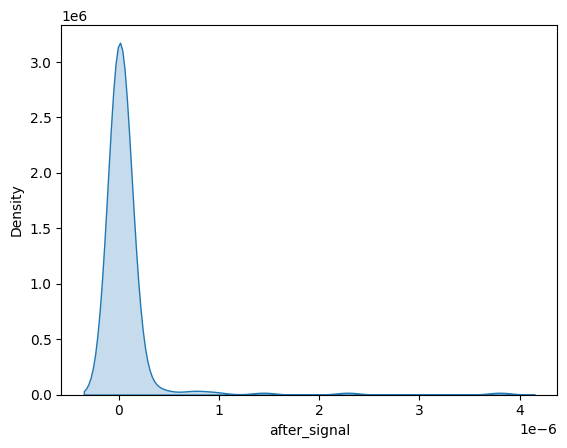

In [79]:
sns.kdeplot(miRNA_distance_result_1["after_signal"],shade=True)
plt.show()

In [9]:
df.columns.values

array(['ensembl_id', 'uniprot_id', 'pdb_id', 'ncbi_gene_id', 'species',
       'assembly_name', 'primary_gene_name', 'ensembl_gene_name',
       'synonyms', 'parent_gene', 'protein_names', 'ensembl_description',
       'uniprot_description', 'ncbi_description',
       'subcellular_localisation', 'object_type', 'biotype',
       'canonical_transcript', 'seq_region_name', 'strand', 'start',
       'end', 'all_transcripts', 'transcript_biotypes',
       'transcript_names', 'transcript_strands', 'transcript_starts',
       'transcript_ends', 'all_exons', 'exon_starts', 'exon_ends',
       'all_translations', 'translation_starts', 'translation_ends'],
      dtype=object)

In [10]:
df["all_transcripts"][0]

nan